# Image Recognition Training
### Name : Simiao S. da G.
### Github Id : https://github.com/nukhugama

### In this Exercise Let's try to playing around how to  :
##### - Read Image
##### - Show Image
##### - Converting Images
##### - Histograms and Feature Extractions
##### - Comparison on Distance and Feature Extractions

## 1. Texture Feature

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
# from google.colab.patches import cv2_imshow
from skimage import data
from skimage.color import rgb2gray

In [3]:
# import the necessary packages For Local Binary Pattern
from skimage import feature
from skimage import io
import numpy as np

#### - Read Images

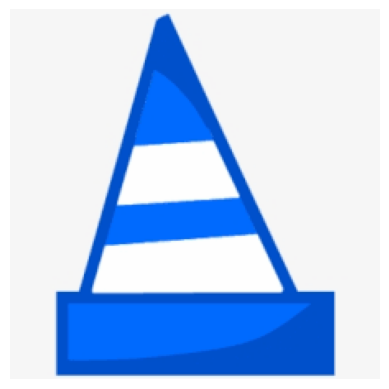

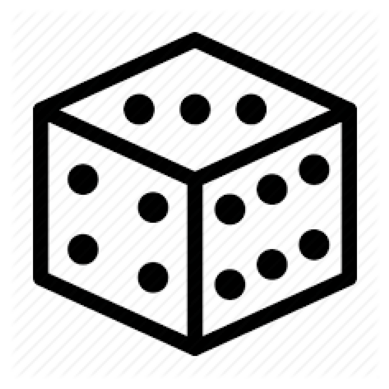

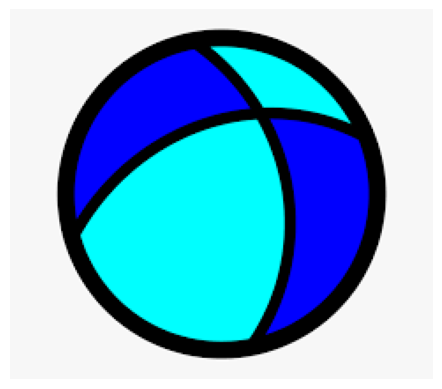

In [4]:

img1 = cv2.imread('tringle.png')
img2 = cv2.imread('square.png')
img3 = cv2.imread('circle.png')


plt.imshow(img1)
plt.axis('off')  # Hide axis values
plt.show()
plt.imshow(img2)
plt.axis('off')  # Hide axis values
plt.show()
plt.imshow(img3)
plt.axis('off')  # Hide axis values
plt.show()

# Wait for a key press and then close the window
# cv2.waitKey(0)
# cv2.destroyAllWindows()


#### - Convert Images

Gray Scale Image


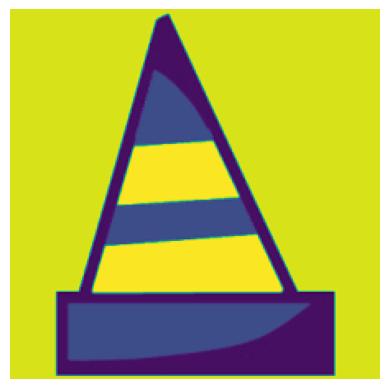

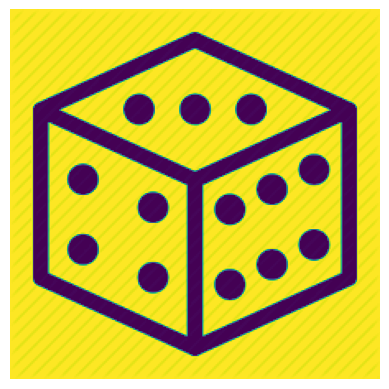

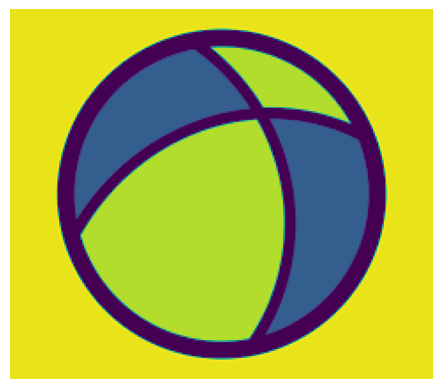

In [5]:

gray1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
gray3 = cv2.cvtColor(img3,cv2.COLOR_BGR2GRAY)
print('Gray Scale Image')
plt.imshow(gray1)
plt.axis('off')  # Hide axis values
plt.show()
plt.imshow(gray2)
plt.axis('off')  # Hide axis values
plt.show()
plt.imshow(gray3)
plt.axis('off')  # Hide axis values
plt.show()

Text(0.5, 1.0, 'LBP Histogram for Triangle Feature')

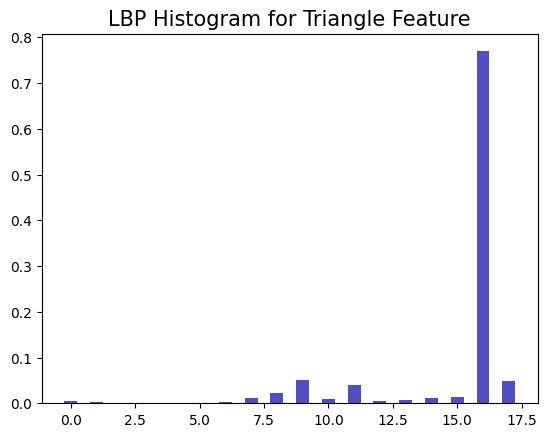

In [6]:
# Define radius, epsilon and number of points
numPoints = 16
radius = 2
eps = 1e-7

lbp1 = feature.local_binary_pattern(gray1, numPoints, radius, method="uniform")
lbp2 = feature.local_binary_pattern(gray2, numPoints, radius, method="uniform")
lbp3 = feature.local_binary_pattern(gray3, numPoints, radius, method="uniform")


(hist1, h1) = np.histogram(lbp1.ravel(),bins=np.arange(0, numPoints + 3),range=(0, numPoints + 2))
#normalisasi vektor histogram
hist1 = hist1.astype("float")
hist1 /= (hist1.sum() + eps)
plt.bar(h1[:-1], hist1, width = 0.5, color='#0504aa',alpha=0.7)
plt.title('LBP Histogram for Triangle Feature',fontsize=15)

Text(0.5, 1.0, 'LBP Histogram for Circle Feature')

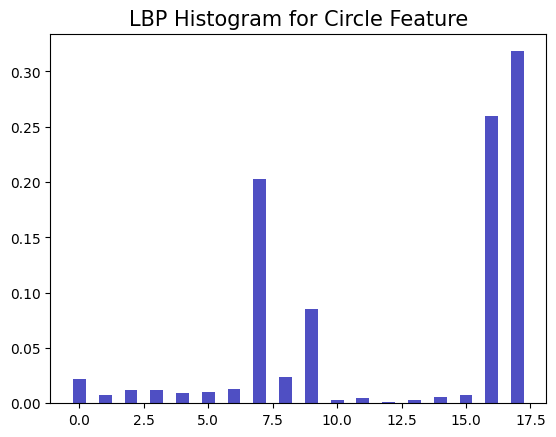

In [7]:
(hist2, h2) = np.histogram(lbp2.ravel(),bins=np.arange(0, numPoints + 3),range=(0, numPoints + 2))
# normalisasi vektor histogram
hist2 = hist2.astype("float")
hist2 /= (hist2.sum() + eps)
plt.bar(h2[:-1], hist2, width = 0.5, color='#0504aa',alpha=0.7)
plt.title('LBP Histogram for Circle Feature',fontsize=15)


Text(0.5, 1.0, 'LBP Histogram for Square Feature')

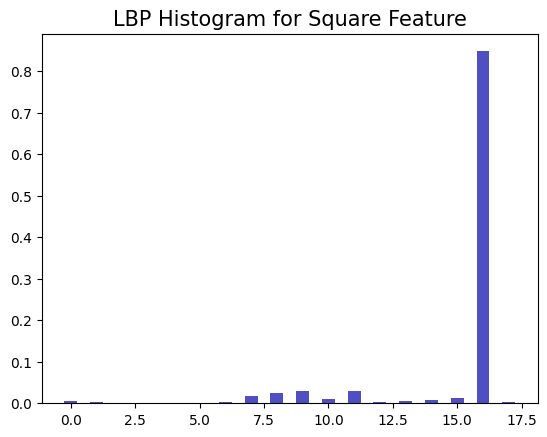

In [8]:

(hist3, h3) = np.histogram(lbp3.ravel(),bins=np.arange(0, numPoints + 3),range=(0, numPoints + 2))
# normalisasi vektor histogram
hist3 = hist3.astype("float")
hist3 /= (hist3.sum() + eps)
plt.bar(h3[:-1], hist3, width = 0.5, color='#0504aa',alpha=0.7)
plt.title('LBP Histogram for Square Feature',fontsize=15)

In [9]:
print(' Feature Extraction for Triangle  ==> ',hist1)

print(' Feature Extraction for Circle ==> ',hist2)

print(' Feature Extraction for Square ==> ',hist3)

 Feature Extraction for Triangle  ==>  [5.78765432e-03 3.41728395e-03 1.77777778e-04 2.96296296e-04
 1.38271605e-04 1.02716049e-03 1.77777778e-03 1.04691358e-02
 2.23802469e-02 5.08246914e-02 8.80987654e-03 3.96444444e-02
 4.64197531e-03 7.38765432e-03 1.16543210e-02 1.33333333e-02
 7.69461728e-01 4.87703704e-02]
 Feature Extraction for Circle ==>  [0.02196543 0.00715062 0.01161481 0.01228642 0.00958025 0.0098963
 0.0125037  0.2029037  0.02368395 0.08525432 0.0028642  0.00511605
 0.0012642  0.00314074 0.00580741 0.00709136 0.25961481 0.31826173]
 Feature Extraction for Square ==>  [5.83333333e-03 2.24206349e-03 9.92063492e-05 4.76190476e-04
 2.97619048e-04 3.37301587e-04 2.06349206e-03 1.68452381e-02
 2.38888889e-02 2.86904762e-02 1.13293651e-02 2.94841270e-02
 3.41269841e-03 5.99206349e-03 7.06349206e-03 1.17658730e-02
 8.47857143e-01 2.32142857e-03]


## Comparison of LBP Feature Extraction Vector of the 3 images(triange, circle and square)

In [10]:
from scipy.spatial import distance
#  Comparison from  3 LBP Feature Extration Vector using Minkowski Distance

# Distance between Tringle and Circle Feature Vector
distTri_Circ = distance.minkowski(hist1,hist2)
print('Distance Vector between Tringle and Circle ', distTri_Circ)

# Distance between Tringle and Square Feauture Vector
distTri_Squ = distance.minkowski(hist1,hist3)
print('Distance Vector between Triangle and Square ', distTri_Squ)

# Distance between Cricle and Square Feauture Vector
distCir_Squ = distance.minkowski(hist2,hist3)
print('Distance Vector between Circle and Square ', distCir_Squ)


Distance Vector between Tringle and Circle  0.610697036081
Distance Vector between Triangle and Square  0.09473529105126054
Distance Vector between Circle and Square  0.6965695792682085


#  2. Color Feature

In [11]:

# MendapatKan Ciri Vektor Mean dan Standar Deviasi Untuk Warna blue, green, dan  red pada gambar segitiga, Lingkaran dan Persegi

(meanSeg, stdSeg) = cv2.meanStdDev(img1)
(meanLin, stdLin) = cv2.meanStdDev(img2)
(meanPer, stdPer) = cv2.meanStdDev(img3)



In [12]:
# Concatenate Statistic Color Feature Mean and Standart Deviation

triangle_stats = np.concatenate([meanSeg, stdSeg]).flatten()
circle_stats = np.concatenate([meanLin, stdLin]).flatten()
square_stats = np.concatenate([meanPer, stdPer]).flatten()

print('Statistical Vector of Triangle : ',triangle_stats)
print('Statistical Vector of Circle : ',circle_stats)
print('Statistical Vector of Square : ',square_stats)

Statistical Vector of Triangle :  [175.33777778 202.33262222 241.3884642  110.27239342  69.4692602
  16.85828365]
Statistical Vector of Circle :  [193.02281481 193.04331852 193.04331852 104.75768599 104.72028935
 104.72028935]
Statistical Vector of Square :  [113.0209127  173.21926587 212.43799603 122.70326527 114.30878675
  88.46691856]


## Comparison of Color Feature Extraction Vector of the 3 images(triange, circle and square)

In [13]:
from scipy.spatial import distance
# Comparison from  3 Colors Feature Extration Vector using Minkowski Distance

# Distance between Tringle and Circle Feature Vector
distTri_Circ = distance.minkowski(triangle_stats,circle_stats)
print('Distance Vector between Tringle and Circle ', distTri_Circ)

# Distance between Tringle and Square Feauture Vector
distTri_Squ = distance.minkowski(triangle_stats,square_stats)
print('Distance Vector between Triangle and Square ', distTri_Squ)

# Distance between Cricle and Square Feauture Vector
distCir_Squ = distance.minkowski(circle_stats,square_stats)
print('Distance Vector between Circle and Square ', distCir_Squ)

Distance Vector between Tringle and Circle  108.30089523919912
Distance Vector between Triangle and Square  113.41082447255623
Distance Vector between Circle and Square  88.58671504126279


# 3. Shape Feature

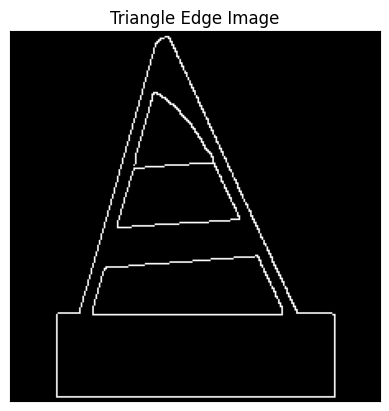

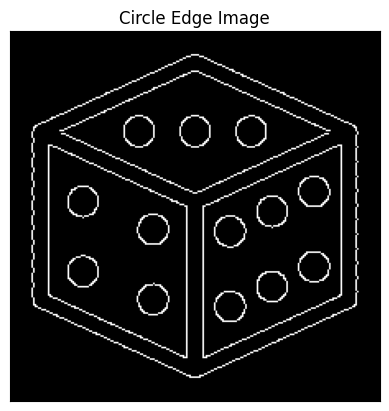

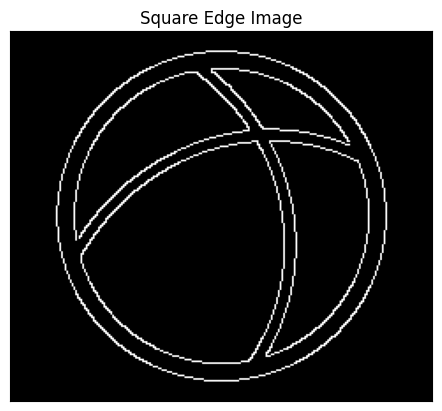

In [14]:

## Canny Edge Detection for Triangle, Circle and Square

edge_triangle = cv2.Canny(gray1,100,200)
edge_circle = cv2.Canny(gray2,100,200)
edge_square = cv2.Canny(gray3, 100,200)

plt.subplots(1),plt.imshow(edge_triangle,cmap = 'gray')
plt.title('Triangle Edge Image'), plt.xticks([]), plt.yticks([])

plt.subplots(1),plt.imshow(edge_circle,cmap = 'gray')
plt.title('Circle Edge Image'), plt.xticks([]), plt.yticks([])

plt.subplots(1),plt.imshow(edge_square,cmap = 'gray')
plt.title('Square Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()


In [15]:
## The process how to get contour in every image(triangle, circle and square)

ret1,thresh1 = cv2.threshold(edge_triangle,127,255,0)
contours1,hierarchy1 = cv2.findContours(thresh1, 1, 2)

ret2,thresh2 = cv2.threshold(edge_circle,127,255,0)
contours2,hierarchy2 = cv2.findContours(thresh2, 1, 2)

ret3,thresh3 = cv2.threshold(edge_square,127,255,0)
contours3,hierarchy3 = cv2.findContours(thresh3, 1, 2)

# Centroid  for triangle, circle and square
cnt1 = contours1[0]
cnt2 = contours2[0]
cnt3 = contours3[0]


### Getting Shape Feature Using Contour Approximation Vector

In [16]:
epsilon1 = 0.1*cv2.arcLength(cnt1,True)
approx1 = cv2.approxPolyDP(cnt1,epsilon1,True)

epsilon2 = 0.1*cv2.arcLength(cnt2,True)
approx2 = cv2.approxPolyDP(cnt2,epsilon2,True)

epsilon3 = 0.1*cv2.arcLength(cnt3,True)
approx3 = cv2.approxPolyDP(cnt3,epsilon3,True)

## Comparison of Shape Feature Extraction Vector of the 3 images(triange, circle and square)

In [18]:
# Comparison  of 3 image  Vector Feature Using Euclidean Distance

from scipy.spatial import distance

# Ubah Matriks manjadi Vector dengan satu dimensi
feat_Seg =  approx1.ravel()
feat_Ling =  approx2.ravel()
feat_Per =  approx3.ravel()

# maximum Lenght
ml = max(len(feat_Seg),len(feat_Ling),len(feat_Per))
# Assign 0 if vector length lesser than maximum length
feat_Seg1 = np.concatenate([feat_Seg , np.zeros(ml-len(feat_Seg))])
feat_Ling1 = np.concatenate([feat_Ling , np.zeros(ml-len(feat_Ling))])
feat_Per1 =  np.concatenate([feat_Per, np.zeros(ml-len(feat_Per))])

#  Distance Vector between Tringle and Circle
distTri_Circ = distance.euclidean(feat_Seg1 ,feat_Ling1)
print('Distance Vector between Tringle and Circle ', distTri_Circ)

# Distance Vector between Triangle and Square
distTri_Squ = distance.euclidean(feat_Seg1,feat_Per1)
print('Distance Vector between Triangle and Square ', distTri_Squ)

# Distance Vector between Circle and Square
distCir_Squ = distance.euclidean(feat_Ling1,feat_Per1)
print('Distance Vector between Circle and Square ', distCir_Squ)

Distance Vector between Tringle and Circle  235.966099260042
Distance Vector between Triangle and Square  200.63897926375125
Distance Vector between Circle and Square  245.7356303021603
